<a href="https://colab.research.google.com/github/DiegoRomanCortes/minitarea4/blob/master/minitarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EI2001 : Ciencia de Datos en Astronomía
**Profesores:** Pía Cortés, Daniela Barrientos, Matías Mattamala, Matías Suazo

##Minitarea 4: Análisis de Cubo de datos extragaláctico y querys.

###Objetivos:
1. Utilizar el paquete **astropy** para trabajar con unidades de medidas, coordenadas y fits.
2. Utilizar datos del google drive personal de cada uno.
3. Lectura de archivos *fits* en objetos extragalácticos en forma de cubo de datos.
4. Utilizar el paquete **astroquery** para hacer query de objetos del SDSS.



###Instrucciones:

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
3. Abrir [Google Colab](https://colab.research.google.com/) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
4. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
5. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
6. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.




#1. FITS en Google Drive.

En el siguiente enlace [(link)](https://docs.google.com/spreadsheets/d/1lT4h9Evwm6i2SBeuCK5dESTm8FijVZX7r6ixq-dt3ZM/edit#gid=0) se encuentra un excel con 30 galaxias observadas con CALIFA usando la técnica de Integral Field Spectroscopy (IFS). Debe escoger una galaxia que se encuentre disponible anotando su nombre en la casilla correspondiente a la galaxia que desee escoger (**No puede elegir una ya escojida por alguien más**). A cada galaxia le corresponde un link con el cual se pueden descargar los datos obtenidos por CALIFA para dicha galaxia en un cubo de datos **fits.gz**.

Descargue el archivo correspondiente y súbalo a la cuenta de Google Drive vinculada con la cuenta de Google que utiliza para trabajar con [Google Colab](https://colab.research.google.com/). Asegúrese que el archivo de descarga corresponde con la galaxia seleccionada, en caso contrario hágalo saber al equipo docente.

Ahora importe los paquetes y funciones necesarias vistas en clases para poder montar su unidad de Google drive. Si lo hace correctamente debiese aparecer un mensaje. Verifique que se muestra al correr esas líneas de código.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# 2. Visualización de la Galaxia 

En esta parte debe hacer lectura del cubo de datos **fits.gz** que se encuentra guardado en su Google Drive. Importe todos los paquetes que sean necesarios, no olvide leer el header (Ya sea en su forma normal o en WCS) e imprímalo en pantalla.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord

from astropy.io import fits
from astropy.wcs import WCS
filename = ('/content/gdrive/My Drive/Astrodatos/NGC0257.V500.rscube.fits.gz')
hdu_fits = fits.open(filename) #abre los fits, pueden abrirse comprimidos en gz
hdu = fits.open(filename)[0] #abre los fits, pueden abrirse comprimidos en gz
header = hdu.header
wcs = WCS(header) #permite leer el header world coordinate system
print(wcs)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'WAVELENGTH'  
CRVAL : 12.00612262369967  8.296891237740997  3749.0  
CRPIX : 37.0  32.0  1.0  
CD1_1 CD1_2 CD1_3  : -0.00027777777777777  0.0  0.0  
CD2_1 CD2_2 CD2_3  : 0.0  0.000277777777777777  0.0  
CD3_1 CD3_2 CD3_3  : 0.0  0.0  2.0  
NAXIS : 77  72  1877


Ahora haga un subplot que contemple 4 imágenes de la galaxia en 4 diferentes longitudes de onda de todo el espectro observado. Usted debe escoger estas cuatro longitudes de onda como se le antoje. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Recuerde importar los paquetes necesarios en caso de no haberlo hecho en algún bloque anterior.

**Consejo**: Dentro de las longitudes de onda, se sugiere que escoja una cercana a los 6563 Angstrom.

(1877, 72, 77)
Valor 1 en el pixel de referencia =  12.00612262369967
Valor 2 en el pixel de referencia =  8.296891237740997
Valor 3 en el pixel de referencia =  3749.0
Pixel de referencia para variable 1 =  37
Pixel de referencia para variable 2 =  32
Pixel de referencia para variable 3 =  1.0
Step para variable 1 =  -0.00027777777777777
Step para variable 2 =  0.000277777777777777
Step para variable 3 =  2.0


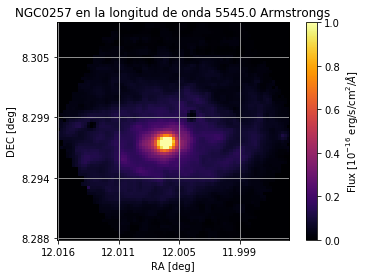

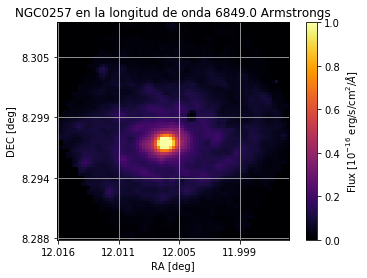

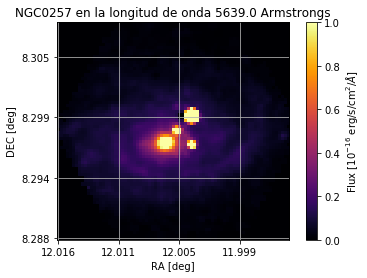

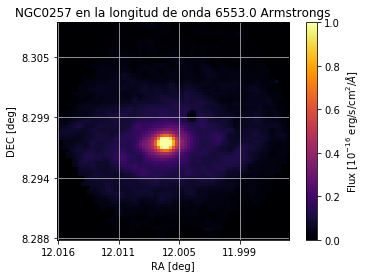

In [4]:
data = hdu.data
print(data.shape)
#Revisar bien los ejes X e Y, hacer que sean variables físicas, ra y dec.

units = header['HIERARCH PIPE UNITS']

print('Valor 1 en el pixel de referencia = ', header['CRVAL1']) #valor inicial de la RA en el pixel de referencia
print('Valor 2 en el pixel de referencia = ', header['CRVAL2']) #valor inicial de la DEC en el pixel de referencia
print('Valor 3 en el pixel de referencia = ', header['CRVAL3'] )#valor inicial de la longitud de onda en el pixel de referencia

print('Pixel de referencia para variable 1 = ', header['CRPIX1'] )#pixel de referencia para la RA inicial
print('Pixel de referencia para variable 2 = ', header['CRPIX2'] )#pixel de referencia para la DEC inicial
print('Pixel de referencia para variable 3 = ', header['CRPIX3'] )#pixel de referencia para la longitud de onda inicial

print('Step para variable 1 = ', header['CD1_1'] )#step o paso en deg entre cada pixel para la RA
print('Step para variable 2 = ', header['CD2_2'] )#step o paso en deg entre cada pixel para la DEC
print('Step para variable 3 = ', header['CD3_3'] )#step o paso en deg entre cada pixel para la Longitud de onda

delt1 = np.arange(0,header['NAXIS1']) - (header['CRPIX1']-1)
step1 = delt1*header['CD1_1']
ra = step1 + header['CRVAL1']

delt2 = np.arange(0,header['NAXIS2']) - (header['CRPIX2']-1)
step2 = delt2*header['CD2_2']
dec = step2 + header['CRVAL2']

delt3 = np.arange(0,header['NAXIS3'])
step3 = delt3*header['CD3_3']
lo = step3 + header['CRVAL3']

#6563
s=[]
i=0
while i < len(lo):
  if abs(lo[i] - 6563) <= 10:
    s.append(i)
  i=i+1  
s=s[0]

#5649
t=[]
i=0
while i < len(lo):
  if abs(lo[i] - 5649) <= 10:
    t.append(i)
  i=i+1  
t=t[0]

r=[np.random.randint(0,(len(data[:,header['CRPIX1'],header['CRPIX2']])-1)/2),\
   np.random.randint((len(data[:,header['CRPIX1'],header['CRPIX2']])-1)/2,(len(data[:,header['CRPIX1'],header['CRPIX2']])-1))]

plt.imshow(data[r[0],:,:],cmap='inferno',origin='lower',vmin=0,vmax=1)
plt.xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3))) #xticks, tupla con numeros originales, tupla con nuevos digitos
plt.yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3))) #yticks, tupla con numeros originales, tupla con nuevos digitos
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid(b=None) #Esto para quitar las lineas de la imagen
cb = plt.colorbar()
#cb.set_label(units)
cb.set_label('Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')
plt.title('NGC0257 en la longitud de onda '+str(lo[r[0]])+' Armstrongs')
plt.show()

plt.imshow(data[r[1],:,:],cmap='inferno',origin='lower',vmin=0,vmax=1)
plt.xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3))) #xticks, tupla con numeros originales, tupla con nuevos digitos
plt.yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3))) #yticks, tupla con numeros originales, tupla con nuevos digitos
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid(b=None) #Esto para quitar las lineas de la imagen
cb = plt.colorbar()
#cb.set_label(units)
cb.set_label('Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')
plt.title('NGC0257 en la longitud de onda '+str(lo[r[1]])+' Armstrongs')
plt.show()

plt.imshow(data[t,:,:],cmap='inferno',origin='lower',vmin=0,vmax=1)
plt.xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3))) #xticks, tupla con numeros originales, tupla con nuevos digitos
plt.yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3))) #yticks, tupla con numeros originales, tupla con nuevos digitos
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid(b=None) #Esto para quitar las lineas de la imagen
cb = plt.colorbar()
#cb.set_label(units)
cb.set_label('Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')
plt.title('NGC0257 en la longitud de onda '+str(lo[t])+' Armstrongs')
plt.show()

plt.imshow(data[s,:,:],cmap='inferno',origin='lower',vmin=0,vmax=1)
plt.xticks((0,20,40,60),(round(ra[0],3),round(ra[20],3),round(ra[40],3),round(ra[60],3))) #xticks, tupla con numeros originales, tupla con nuevos digitos
plt.yticks((0,20,40,60),(round(dec[0],3),round(dec[20],3),round(dec[40],3),round(dec[60],3))) #yticks, tupla con numeros originales, tupla con nuevos digitos
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid(b=None) #Esto para quitar las lineas de la imagen
cb = plt.colorbar()
#cb.set_label(units)
cb.set_label('Flux [10$^{-16}$ erg/s/cm$^2$/$\AA$]')
plt.title('NGC0257 en la longitud de onda '+str(lo[s])+' Armstrongs')
plt.show()

#3. Espectros de la Galaxia

Como saben, a cada pixel le corresponde un espectro. Ahora haga un subplot que contemple el espectro de 9 pixeles de la galaxia. 8 de los 9 pixeles deben ser escogidos al azar, mientras que uno de ellos debe corresponder al espectro de los pixeles de referencia que el header indica. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Recuerde importar los paquetes necesarios en caso de no haberlo hecho en algún bloque anterior.

Finalmente calcule el redshift al cual se encuentra el objeto, para ello puede indentificar las líneas de los espectros obtenidos en esta [página](http://skyserver.sdss.org/dr15/en/tools/chart/navi.aspx). El cálculo del redshift debe hacerse con la información de los espectros del fits. Ignore la rotación de la galaxia. 

**Hint:** Le puede ser útil saber que la línea de H$\alpha$ se encuentra centrada en 6563 Angstroms. La longitud de onda de las primeras líneas de la serie de Balmer las puede encontrar en [aquí](https://es.wikipedia.org/wiki/L%C3%ADneas_de_Balmer). Imprima en pantalla la operación a realizar y que línea o líneas usó para determinar el redshift al cual se encuentra la galaxia.

[[ 5 64 70 65 23  2 60  1]]
[[15  6  3 39  5 14 55 54]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 71 + 1) instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 71 + 1) instead
  


<Figure size 432x288 with 0 Axes>

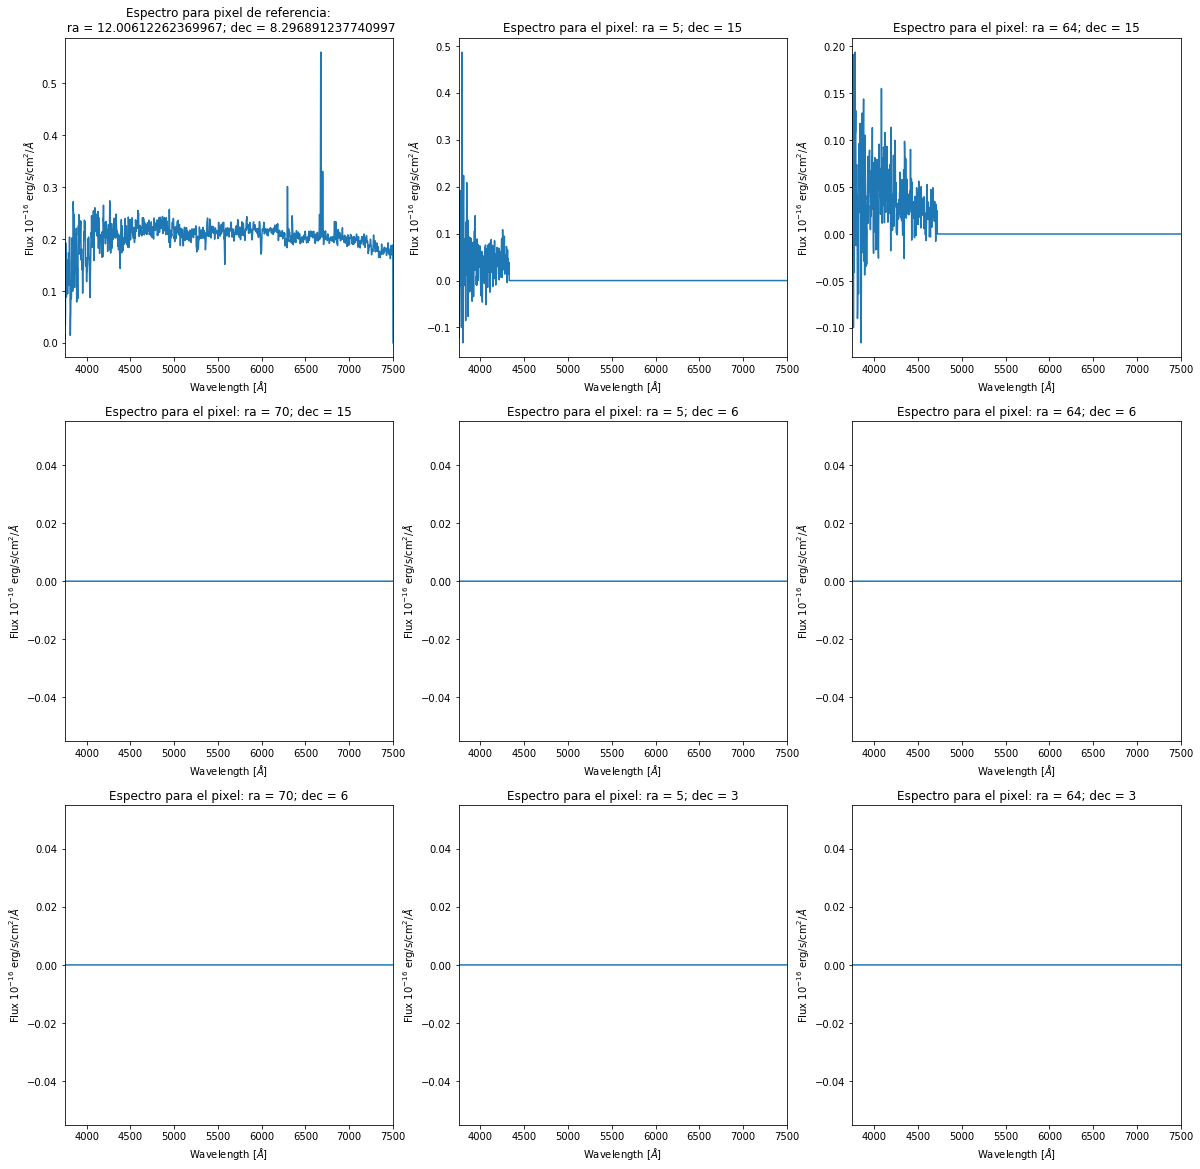

Longitud observada:  6677.0
El redshift es: 0.01768023167200128


In [5]:
a=np.random.random_integers(len(data[0])-1, size=(1,8))
b=np.random.random_integers(len(data[1])-1, size=(1,8))
print(a)
print(b)

plt.figure()

fig, ax = plt.subplots(figsize = (20,20), ncols=3, nrows = 3)

ax[0][0].plot(lo,data[:,header['CRPIX1'],header['CRPIX2']])
ax[0][0].set_xlim(3750,7500)
#plt.ylim(0,0.16)
ax[0][0].set_xlabel('Wavelength [$\AA$]')
ax[0][0].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')
ax[0][0].set_title('Espectro para pixel de referencia:\n '+'ra = '+str(header['CRVAL1'])+'; dec = '+str(header['CRVAL2']))
#plt.show()

def graficar(a,b,i,j):
  #plt.subplot(1,1,i)
  ax[i][j].plot(lo,data[:,a,b])
  ax[i][j].set_xlim(3750,7500)
  #plt.ylim(0,0.16)
  ax[i][j].set_xlabel('Wavelength [$\AA$]')
  ax[i][j].set_ylabel('Flux 10$^{-16}$ erg/s/cm$^2$/$\AA$')
  ax[i][j].set_title('Espectro para el pixel: '+'ra = '+str(a)+'; dec = '+str(b))
  #plt.show()

graficar(a[0][0],b[0][0],0,1)
graficar(a[0][1],b[0][0],0,2)
graficar(a[0][2],b[0][0],1,0)
graficar(a[0][0],b[0][1],1,1)
graficar(a[0][1],b[0][1],1,2)
graficar(a[0][2],b[0][1],2,0)
graficar(a[0][0],b[0][2],2,1)
graficar(a[0][1],b[0][2],2,2)
plt.show()


#redshift

#z:redshift
#1 + z= lambda_obs/lambda_em

pix_lambda_obs = np.where(data[:,header['CRPIX1'],header['CRPIX2']] >= np.max(data[:,header['CRPIX1'],header['CRPIX2']]))
lambda_obs = lo[pix_lambda_obs[0][0]]
print('Longitud observada: ',lambda_obs)

#lambda_em = lambda_obs/(1+	0.017592) #la longitud emitida se calculo con el redshift. No logre encontrar longitud para hacer el ejercicio
#print(lambda_em)

lambda_em = 6561
z= lambda_obs/lambda_em - 1
print('El redshift es: '+str(z))


#4. Coordenadas

En esta parte deben crear una variable que contenga un objeto SkyCoord definido con los dos últimos dígitos de rut como ascención recta y declinación en el sistema ICRS (No contar el dígito verificador).

**Ejemplo:** si su RUT es 12.345.678 - 9. La ascención recta y declinación para ese objeto debe ser 78°. Si los úlitmos dos dígitos son mayores que noventa, utilice solo el último.

In [6]:
RUT = '20.299.495-4'
rut = SkyCoord(ra=5,dec=5,frame='icrs', unit='deg')

print(rut)

<SkyCoord (ICRS): (ra, dec) in deg
    (5., 5.)>


#5. Query: Imagen

En esta parte haga un query a los datos del SDSS utilizando como coordenadas las definidas anteriormente en una región de radio 10 arcsec, además, asegúrese que los objetos de la busqueda cuentan con un espectro. En caso de no encontrar algo, multiplique el radio por 2 hasta encontrar un objeto. Extraiga el espectro y la fotometría en las bandas z e i.

Imprima en pantalla el WCS header de alguno de los fits fotometría, y proceda a graficar las regiones mostradas en los dos fits fotométricos descargados. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Como los datos son del SDSS, ustedes encontraran una imagen de la placa entera, hagan un zoom mostrando de forma cercana el objeto que les debiese haber salido al azar, queda a su criterio cuanto deben ampliar la imagen ustedes.

In [8]:
#!pip install astroquery #esto para instalar astroquery
from astroquery.sdss import SDSS

xid = SDSS.query_region(rut, radius = 40*u.arcsec, spectro=True) #radius por defecto es 2 arcsec
#podemos descargar los datos de todos los objetos encontrados en xid
print('xid: ',xid)
#Algunas pequeñas funciones de conversión
#print (8*u.arcmin + 5.63*u.arcsec).to(u.deg)
#print (14*u.deg + 50*u.arcmin + 23.3*u.arcsec).to(u.deg)

sp = SDSS.get_spectra(matches=xid) #espectro
imz = SDSS.get_images(matches=xid, band='z') #fotometría en la banda z
imi = SDSS.get_images(matches=xid, band='i') #fotometría en la banda i

    100% |████████████████████████████████| 4.2MB 5.4MB/s 
    100% |████████████████████████████████| 61kB 19.7MB/s 
    100% |████████████████████████████████| 2.3MB 2.2MB/s 
    100% |████████████████████████████████| 102kB 18.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/8a/d1/1e/4124d9ef35e2bbfbaa284c97dd49d9babbab42d966c4bea190
Successfully built astroquery


/usr/local/lib/python3.6/dist-packages/astroquery/sdss/__init__.py:29: UserWarning: Experimental: SDSS has not yet been refactored to have its API match the rest of astroquery (but it's nearly there).
  warnings.warn("Experimental: SDSS has not yet been refactored to have its API "
/usr/local/lib/python3.6/dist-packages/astroquery/sdss/core.py:856: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


xid:         ra              dec               objid        ... run2d  instrument
---------------- ---------------- ------------------- ... ------ ----------
5.00166043292813 5.00679182333601 1237678661963088164 ... v5_7_0       BOSS


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 5.06742940089  5.10520906839  
CRPIX : 1025.0  745.0  
CD1_1 CD1_2  : 3.32827311915e-08  0.000110021124425  
CD2_1 CD2_2  : 0.000109989623084  -5.16527868438e-08  
NAXIS : 2048  1489
Valor 1 en el pixel de referencia =  5.06742940089
Valor 2 en el pixel de referencia =  5.10520906839
Pixel de referencia para variable 1 =  1025.0
Pixel de referencia para variable 2 =  745.0
Step para variable 1 =  3.32827311915e-08
Step para variable 2 =  -5.16527868438e-08


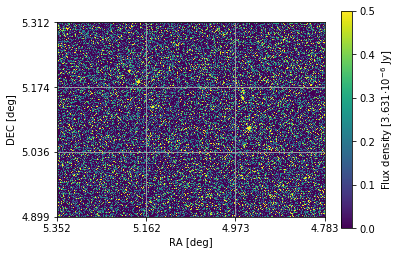

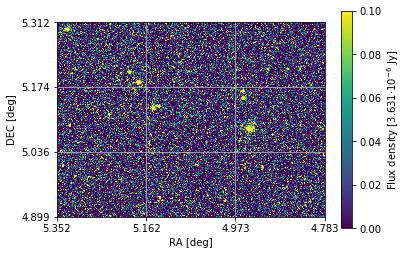

In [19]:
headerz = imz[0][0].header
wcsz = WCS(headerz)
print(wcsz)

print('Valor 1 en el pixel de referencia = ',headerz['CRVAL1']) #valor inicial de la RA en el pixel de referencia
print('Valor 2 en el pixel de referencia = ',headerz['CRVAL2']) #valor inicial de la DEC en el pixel de referencia

print('Pixel de referencia para variable 1 = ', headerz['CRPIX1']) #pixel de referencia para la RA inicial
print('Pixel de referencia para variable 2 = ', headerz['CRPIX2']) #pixel de referencia para la DEC inicial

print('Step para variable 1 = ', headerz['CD1_1']) #step o paso en deg entre cada pixel para la RA
print('Step para variable 2 = ', headerz['CD2_2']) #step o paso en deg entre cada pixel para la DEC

delt1 = np.arange(0,headerz['NAXIS1']) - (headerz['CRPIX1']-1)
step1 = delt1*header['CD1_1']
ra = step1 + headerz['CRVAL1']

delt2 = np.arange(0,headerz['NAXIS2']) - (headerz['CRPIX2']-1)
step2 = delt2*header['CD2_2']
dec = step2 + headerz['CRVAL2']

dataz = imz[0][0].data
datai = imi[0][0].data
#imagen banda z
plt.imshow(dataz,cmap='viridis',origin='lower',vmin=0,vmax=0.5)
plt.xticks((0,len(ra)/3,2*len(ra)/3,len(ra)),(round(ra[0],3),round(ra[int(len(ra)/3)],3),round(ra[int(2*len(ra)/3)],3),round(ra[-1],3))) #xticks, tupla con numeros originales, tupla con nuevos digitos
plt.yticks((0,len(dec)/3,int(2*len(dec)/3),len(dec)),(round(dec[0],3),round(dec[int(len(dec)/3)],3),round(dec[int(2*len(dec)/3)],3),round(dec[-1],3))) #yticks, tupla con numeros originales, tupla con nuevos digitos
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid(b=None) #Esto para quitar las lineas de la imagen
cb = plt.colorbar()
cb.set_label('Flux density [3.631$ \cdot 10^{-6}$ Jy]')
plt.show()

#imagen banda i
plt.imshow(datai,cmap='viridis',origin='lower',vmin=0,vmax=0.1)
plt.xticks((0,len(ra)/3,2*len(ra)/3,len(ra)),(round(ra[0],3),round(ra[int(len(ra)/3)],3),round(ra[int(2*len(ra)/3)],3),round(ra[-1],3))) #xticks, tupla con numeros originales, tupla con nuevos digitos
plt.yticks((0,len(dec)/3,2*len(dec)/3,len(dec)),(round(dec[0],3),round(dec[int(len(dec)/3)],3),round(dec[int(2*len(dec)/3)],3),round(dec[-1],3))) #yticks, tupla con numeros originales, tupla con nuevos digitos
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')
plt.grid(b=None) #Esto para quitar las lineas de la imagen
cb = plt.colorbar()
cb.set_label('Flux density [3.631$ \cdot 10^{-6}$ Jy]')
plt.show()

#6. Query: Espectro

En esta parte haga un gráfico con los datos espectroscópicos del objeto encontrado. Imprima en pantalla el WCS header. Puede enchular los gráficos tanto como desee, es importante eso sí que todos contengan la información básica necesaria para que pueda ser visualizada científicamente. Compare el objeto con el encontrado en esta [página](http://skyserver.sdss.org/dr15/en/tools/chart/navi.aspx), identifique las líneas y hagan que se vean en el espectro bien señalizadas.

WCS Keywords

Number of WCS axes: 1
CTYPE : ''  
CRVAL : 0.0  
CRPIX : 0.0  
PC1_1  : 1.0  
CDELT : 1.0  
NAXIS : 0  0


a string value was expected. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


Text(0, 0.5, 'Flux density [10$^{-17}$ erg/cm$^2$/s/$\\AA$]')

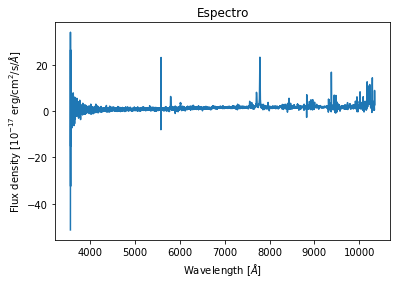

In [17]:
#print repr(sp[0][0].header)
print(WCS(sp[0][0].header))
fits = sp[0]
#print repr(fits.info())
#print fits[1].columns
scidata = fits[1].data
flux = (scidata['flux'])
lam = scidata['loglam']

fig = plt.figure()
plt.plot(10**(lam), flux)

plt.title('Espectro')
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Flux density [10$^{-17}$ erg/cm$^2$/s/$\AA$]')